<a href="https://colab.research.google.com/github/JiwooLee0822/transformer/blob/main/Embedding_%26_FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Embedding

use learned embeddings to convert the input tokens and output tokens to vectors of dimension dmodel.

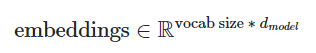

In [47]:
import math
import torch.nn as nn

class EmbeddingLayer(nn.Module):
  def __init__(self, vocab_size, embed_dim):
    super(EmbeddingLayer, self).__init__()
    self.embed_dim = embed_dim
    self. embed = nn.Embedding(vocab_size, embed_dim) # 임베딩할 단어 개수, 벡터의 차원

  def forward(self, x):
    return self.embed * math.sqrt(self.embed_dim)

## Positional Encoding
https://incredible.ai/nlp/2020/02/29/Transformer/#1-introduction

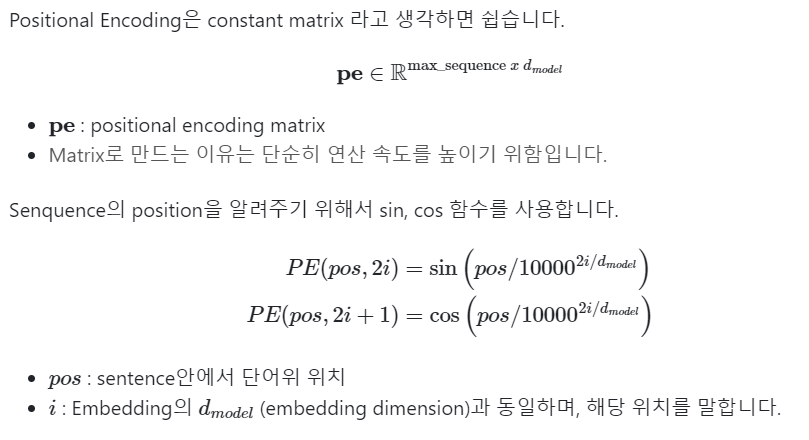

In [48]:
import torch

class PositionalEncoding(nn.Module):
  def __init__(self, embed_dim, dropout = 0.1, max_seq_len = 400):
    super(PositionalEncoding, self).__init__()
    self.dropout = nn.Dropout(p=dropout)

    pe = torch.zeros(max_seq_len, embed_dim) # max_seq_len x embed_dim
    position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1) # tensor 차원 변경
    div_term = torch.exp(torch.arange(0, embed_dim, 2).float()*(-math.log(10000.0)/embed_dim))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    pe = pe.unsqueeze(0)
    self.register_buffer('pe', pe)
  def forward(self, x):
    return x + self.pe[:, :x.size(1)].detach()

## Position-wise FeedForward Networks

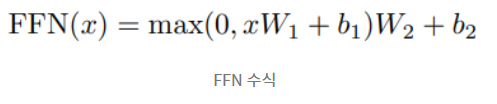

In [49]:
class PositionWiseFeedForward(nn.Module):

  def __init__(self, embed_dim, d_hidden, drop_prob = 0.1):
    super(PositionWiseFeedForward, self).__init__()

    self.w_1 = nn.Linear(embed_dim, d_hidden)
    self.w_2 = nn.Linear(d_hidden, embed_dim)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(drop_prob)

  def forward(self, x):
    x = self.w_1(x)
    # 먼저 relu
    x = self.relu(x)
    # 이후 dropout
    x = self.dropout(x)
    x = self.w_2(x)
    return x
